## Exercise 


For this exercise, you will be working with the [House Price Dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/code).

Please grab the train.csv file from Kaggle and explore this dataset. You need to perform explroatory data analysis and see if there is any correlation between the variables and analyze the distribution of the dataset. The question is open-ended and basically you're asked to perform EDA. 


1- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 3 of your assignment, you need to submit at least one jupyter notebook file and one pdf file.


2- Push your code and project to github and provide the link to your code here. Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510





In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('train.csv')
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Summary of SalePrice

In [23]:
df.describe()['SalePrice']
#describe(df['SalePrice'])

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The average Sale price for the house is 163k.The maximum price is 755k and the minimum price is 34k

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

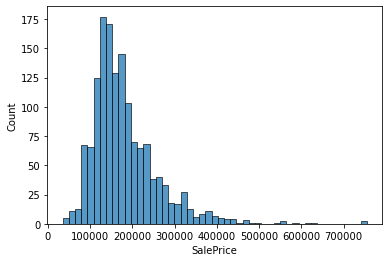

In [6]:
sns.histplot(df['SalePrice'])

From the histogram above, the distribution of our variable-- SalePrice is skewed to right. Thus, a log term of SalePrice should be generated for linear regression.

## Distribution of SalePrice by MSZoning

 MSZoning: Identifies the general zoning classification of the sale.
   A    Agriculture
   C    Commercial
   FV   Floating Village Residential
   I     Industrial
   RH   Residential High Density
   RL   Residential Low Density
   RP   Residential Low Density Park 
   RM   Residential Medium Density
   
 comparing Salesprice with MSZoning

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

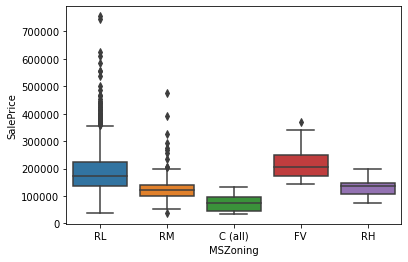

In [14]:
from matplotlib import pyplot as plt
%matplotlib inline
sns.boxplot(x="MSZoning",y ="SalePrice",data=df)

The graph above shows the distribution of SalePrice by MSZoning. The sales in "Floating Village Residential" area have the highest average sale price, and then "Residential Low Density". While "Commercial" sales have the lowest average sale price.

It is surprising that commercial area has the lowest average Sale Price while village area has the highest. One possible explanation could be SalePrice is also related to the size of houses.

## Distribution of SalePrice by BldgType

Describing SalePrice by different cateogries of BldfType.

BldgType: Type of dwelling
   1Fam Single-family Detached  
   2FmCon   Two-family Conversion; originally built as one-family dwelling
   Duplx    Duplex
   TwnhsE   Townhouse End Unit
   TwnhsI   Townhouse Inside Unit
         

Text(0.5, 1.0, 'Saleprice by BldgType')

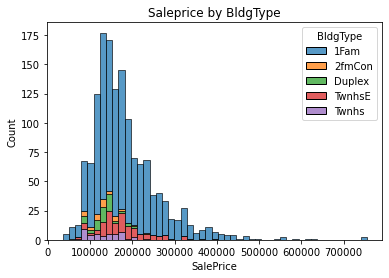

In [43]:
#sns.jointplot(x = 'BldgType',y = 'SalePrice', data = df, color = 'red')
sns.histplot(data=df,x='SalePrice',hue='BldgType',multiple="stack").set_title('Saleprice by BldgType')

For houses with type of Single-family, most of their prices are within the range from 50000 to 300000
For Two-family Conversion, Duplex, Townhouse End Unit and Townhouse Inside Unit, most of house prices are ranging from 75000 to 210000
The highest and lowest house price both come to Single-family house type

## Distribution of SalePrice by OverallQuality

OverallQual: Rates the overall material and finish of the house

   10   Very Excellent
   9    Excellent
   8    Very Good
   7    Good
   6    Above Average
   5    Average
   4    Below Average
   3    Fair
   2    Poor
   1    Very Poor

Text(0.5, 1.0, 'Saleprice by OverAll Quality')

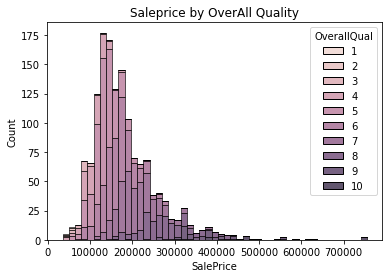

In [45]:
sns.histplot(data=df,x='SalePrice',hue='OverallQual',multiple="stack").set_title('Saleprice by OverAll Quality')

Most houses fall in the categories 4,5,6,7 i.e "Below Average", "Average", "Above Average" and "Good".
The higher rate of overall quality,higher its sale price
For each rate level of overall quality, the distribution of house price is almost symmetric

## Heatmap based on SalePrice

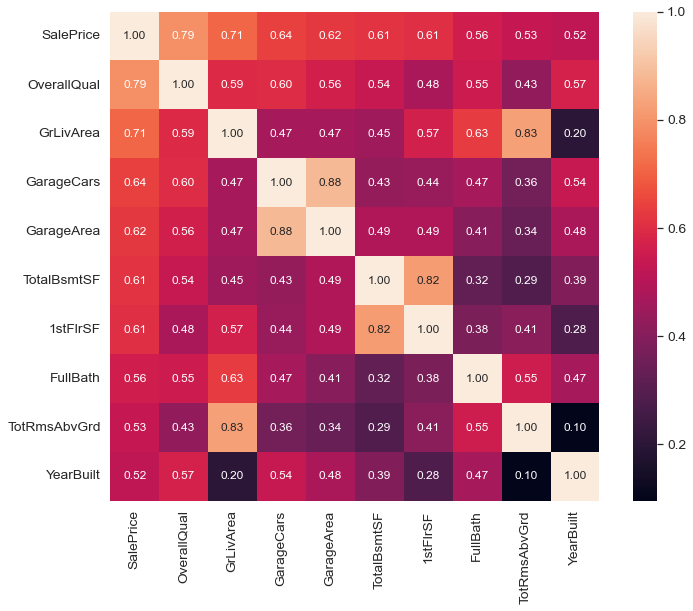

In [59]:

corrm = df.corr()
cols = corrm.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
f,ax=plt.subplots(figsize=(12,9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Correlation between SalePrice and some numeric variables

### Scatterplot of SalePrice and GrLivArea

<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>

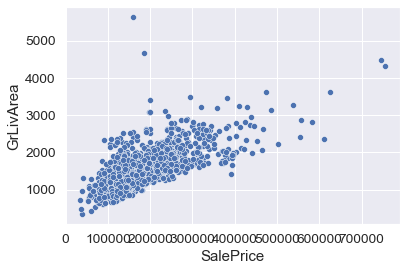

In [66]:
sns.scatterplot(data=df, x="SalePrice", y="GrLivArea")

SalePrice is positively correlated with GrLivArea(Above grade (ground) living area square feet) . There are few outliers on the top left and right corner

### Scatterplot of SalePrice and TotalBsmtSF

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

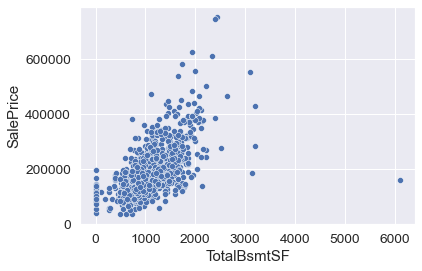

In [71]:
sns.scatterplot(data=df, y="SalePrice", x="TotalBsmtSF")

SalePrice is positively correlated with TotalBsmtSF(Total square feet of basement area). There is one outlier in the right corner.

### Scatterplot of SalePrice and GarageArea

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

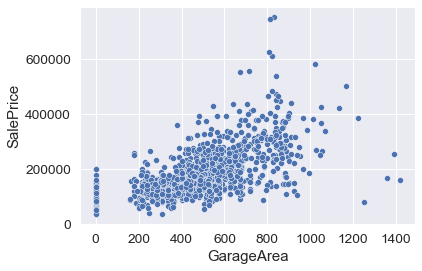

In [70]:
sns.scatterplot(data=df, y="SalePrice", x="GarageArea")

SalePrice is positively correlated with GarageArea(Size of garage in square feet). There is are few outliers on the top and the right.

### Scatterplot of SalePrice and TotRmsAbvGrd

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

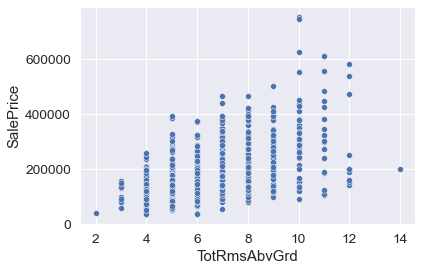

In [72]:
sns.scatterplot(data=df, y="SalePrice", x="TotRmsAbvGrd")

SalePrice is positively correlated with TotRmsAbvGrd(Total rooms above grade (does not include bathrooms)). 
We can see increase in Saleprice with increase in TotRmsAbvGrd.

Please find the code pushed to GIT in the below given URL
https://github.com/sameekshamendon/Python_Assignment3_Part3.git